# Pymaceuticals Inc.
---

### Analysis

After reviewing the results of merging the test data, cleaning it and Summary information, bar charts, pie charts, the box plots, the line graph, scatter plot, and the correlation/regression plots, the following trends could be seen.
•	Based upon the statistical summary information, Capomulin and Ramicane had the greatest impact on reducing tumor volume
•	The bar charts showed the greatest number of tests were also completed on Capomulin and Ramicane.
•	The pie charts showed the distribution of male to female was about even within 1% of 50/50.
•	The Quartiles, Outliers and Boxplots showed Capomulin and Ramicane had the greatest impact on reducing tumor volume.
o	Based upon the quartiles, it would appear Ramicane may have slightly better results because the upper quartile was slightly lower as well as the lower quartile.
•	The line plot for mouse l1509 using Capomulin treatment showed the tumor continued to grow until about day 20, then the tumor reduced in sized for the next 15 days, and then started to grow again.  I would appear the observations were stopped after about 45 days.
o	Longer tests may need to be performed to see if the tumors continue to grow.
•	The scatter plot combined with Linear regression showed a positive correlation between mouse weight and average volume of Tumor.
o	It could be concluded that larger mice have larger tumors
o	Possibly there could be a correlation that fatter mice have larger tumors.

Three Conclusions:
1.	Capomulin and Ramicane had the greatest impact on reducing tumor size.
a.	It would appear that it takes about 20 days to take effect
b.	Possibly the drug effect starts to become non-effective after 35 days.
2.	The weight of the mouse seemed to impact the volume of tumor.  (larger mice have more tumor volume).
3.	Ramicane might be slightly better than Capomulin based upon the box plot.
4.	Who ever took the test, may have favored Capomulin and Ramicane because they performed about 20% more tests.
a.	Seems odd the best drugs had the most testing completed.

I used snippits from class notes and reviewing video recordings of class.
I utilized ChatGPT to help me write the code and understand the definitions of each code line.
I consulted with classmate Bobbi Fletchall.
I asked questions of AskBCS Learning Assistant.

 

In [23]:
# Importing essential libraries
import matplotlib.pyplot as plt  # Used for creating visualizations
import pandas as pd  # Pandas for data manipulation and analysis
import scipy.stats as st  # Scipy.stats for statistical functions

# Defining paths to the data files
mouse_metadata_path = "data/Mouse_metadata.csv"  # Path to mouse metadata file
study_results_path = "data/Study_results.csv"  # Path to study results file

# Reading the data from CSV files
mouse_metadata = pd.read_csv(mouse_metadata_path)  # Reading mouse metadata into a DataFrame
study_results = pd.read_csv(study_results_path)  # Reading study results into a DataFrame

# Combining the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")  # Merging data on 'Mouse ID'

# Displaying the first few rows of the combined DataFrame for preview
combined_data.head()  # Displays the first 5 rows of the combined DataFrame in a formatted style



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Determine the number of unique mouse IDs
unique_mice_count = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice in the study: {unique_mice_count}")

# Check for any mouse ID with duplicate time points
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Display if there are any duplicates
if len(duplicate_mouse_ids) > 0:
    print(f"Duplicate Mouse IDs at the same timepoints: {duplicate_mouse_ids}")
else:
    print("No duplicate Mouse IDs found.")

# Display data for the mouse ID with duplicates
if len(duplicate_mouse_ids) > 0:
    for mouse_id in duplicate_mouse_ids:
        display_data = combined_data[combined_data['Mouse ID'] == mouse_id]
        print(f"Data for Mouse ID {mouse_id}:")
        print(display_data)

# Create a new DataFrame where duplicate mouse data is removed
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
print("\nData cleaned. Duplicate mouse IDs removed.")

# Displaying the first few rows of the cleaned DataFrame for preview
cleaned_data.head()  # Displays the first 5 rows of the cleaned DataFrame


Number of unique mice in the study: 249
Duplicate Mouse IDs at the same timepoints: ['g989']
Data for Mouse ID g989:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Pr

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [25]:
# Grouping the cleaned data by 'Drug Regimen'
# This creates a group for each unique drug regimen in the dataset
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculating summary statistics for tumor volume for each drug regimen
# 'agg' function applies specified statistical functions to each group
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming columns for better readability
# 'Mean Tumor Volume', 'Median Tumor Volume', etc. are more descriptive column names
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                         'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Displaying the summary statistics DataFrame
# This will show the DataFrame with the new column names and the calculated statistics
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

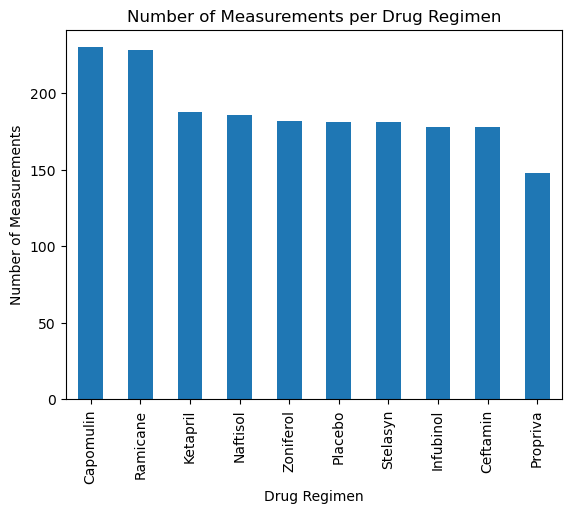

In [26]:
# Bar Chart using Pandas
# Counting the number of measurements for each Drug Regimen
measurement_counts = cleaned_data['Drug Regimen'].value_counts()

# Creating a bar chart using Pandas' DataFrame.plot() method
# 'kind='bar'' specifies that we want a bar chart
# The chart uses the index of the Series (Drug Regimen names) as the x-axis and the values (counts) as the y-axis
pandas_bar_chart = measurement_counts.plot(kind='bar', title='Number of Measurements per Drug Regimen')

# Setting the labels for x and y axes
pandas_bar_chart.set_xlabel("Drug Regimen")
pandas_bar_chart.set_ylabel("Number of Measurements")

# Displaying the chart
plt.show()

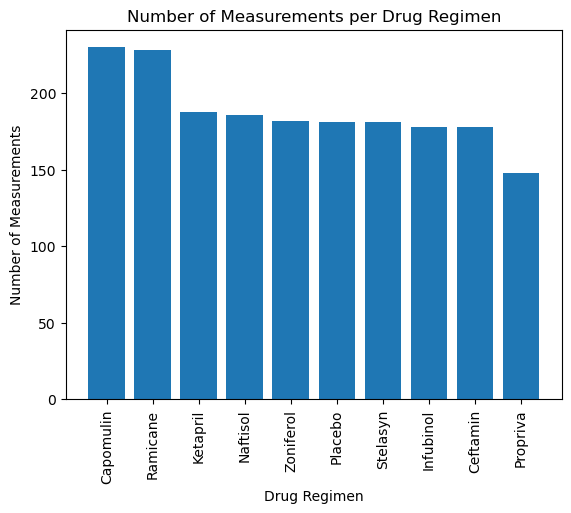

In [27]:
# Creating a bar chart using Matplotlib's pyplot methods
import matplotlib.pyplot as plt  # Importing the Matplotlib library

# 'plt.bar()' is used to create a bar chart
# 'x=measurement_counts.index' sets the x-axis labels to be the Drug Regimen names
# 'height=measurement_counts.values' sets the height of the bars to be the counts
plt.bar(x=measurement_counts.index, height=measurement_counts.values)

# Setting the title and labels for x and y axes
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the chart
plt.show()




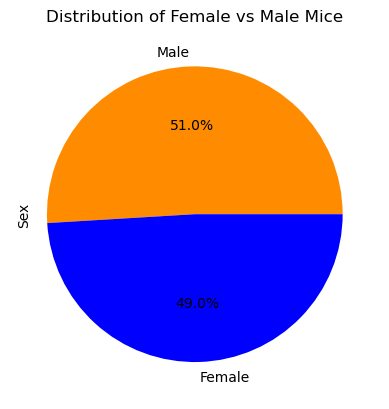

In [7]:
# Counting the number of female and male mice
sex_distribution = cleaned_data['Sex'].value_counts()

# Creating a pie chart using Pandas' DataFrame.plot() method
# 'kind='pie'' specifies a pie chart
# 'autopct' adds percentage labels inside each wedge
# 'startangle=0' rotates the pie chart so that female data is on the bottom
# 'colors' specifies the colors for each wedge
pandas_pie_chart = sex_distribution.plot(kind='pie', autopct='%1.1f%%', 
                                         title='Distribution of Female vs Male Mice', 
                                         startangle=0, colors=['darkorange', 'blue'], 
                                         ylabel='')

# Adding a vertical label 'Sex' to the left of the pie chart
# The coordinates (-1.2, 0) position the label, 'va' vertically aligns it, and 'rotation' makes it vertical
plt.text(-1.2, 0, 'Sex', va='center', rotation='vertical')

# Displaying the chart
# 'plt.show()' renders the chart in the notebook
plt.show()



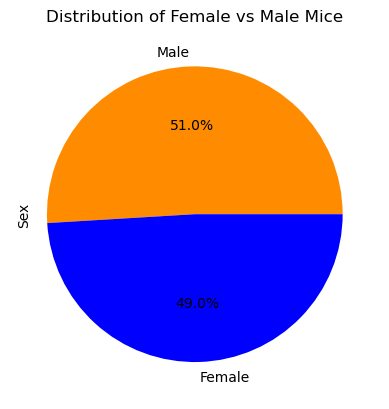

In [28]:
import matplotlib.pyplot as plt  # Importing the Matplotlib library

# Creating a pie chart using Matplotlib's pyplot methods
# 'plt.pie()' is used for creating a pie chart
# 'x' sets the sizes of the wedges
# 'labels' sets labels for each wedge
# 'autopct' adds percentage labels inside each wedge
# 'startangle=0' rotates the pie chart so that female data is on the bottom
# 'colors' specifies the colors for each wedge
plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%', 
        startangle=0, colors=['darkorange', 'blue'])

# Setting the title for the pie chart
# 'plt.title()' sets the title of the chart
plt.title('Distribution of Female vs Male Mice')

# Adding a vertical label 'Sex' to the left of the pie chart
# The coordinates (-1.2, 0) position the label, 'va' vertically aligns it, and 'rotation' makes it vertical
plt.text(-1.2, 0, 'Sex', va='center', rotation='vertical')

# Displaying the chart
# 'plt.show()' renders the chart in the notebook
plt.show()



## Quartiles, Outliers and Boxplots

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


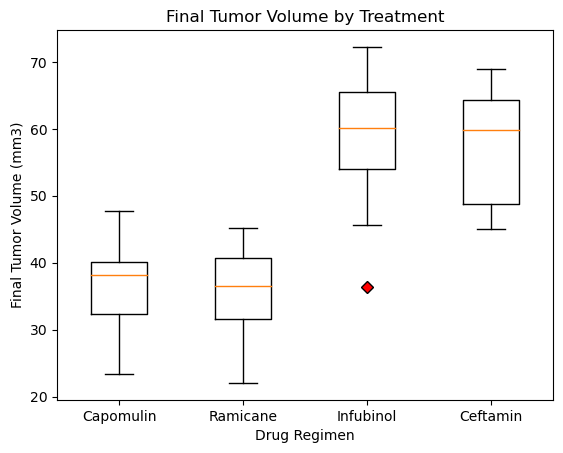

In [29]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Step 1: Create a grouped DataFrame with the last timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this grouped DataFrame with the original cleaned DataFrame
merged_data = last_timepoint.merge(cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Step 2: Lists to hold treatment names and tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Step 3: Loop through each treatment
for treatment in treatments:
    # Locate the rows corresponding to each treatment and get the final tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append these volumes to the tumor_vol_data list
    tumor_vol_data.append(final_tumor_vol)
    
    # Step 4: Calculate quartiles, IQR, and identify outliers
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

# Step 5: Generate a box plot of the final tumor volume for all mice in each treatment group
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))

# Display the box plot
plt.show()



## Line and Scatter Plots

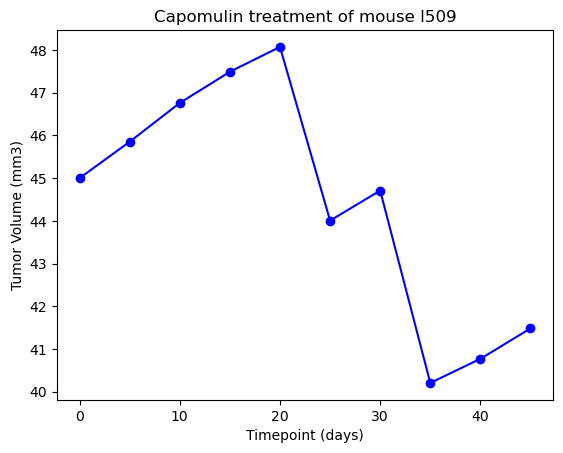

In [30]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Step 1: Filter data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']  # Filter for Capomulin data

# Selecting a specific mouse.
selected_mouse_id = 'l509'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]  # Select the specific mouse

# Step 2: Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')  # Create line plot
plt.xlabel('Timepoint (days)')  # X-axis label
plt.ylabel('Tumor Volume (mm3)')  # Y-axis label
plt.title(f"Capomulin treatment of mouse {selected_mouse_id}")  # Plot title
plt.show()  # Display plot



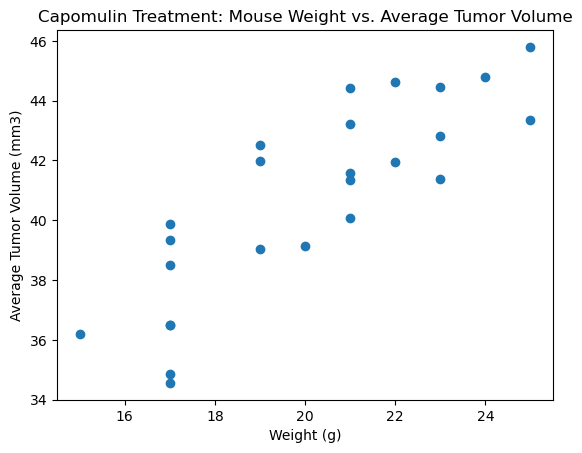

In [31]:
# Step 1: Calculate average tumor volume and weight for each mouse in the Capomulin regimen
# We only select numeric columns for mean calculation to avoid TypeError
capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Step 2: Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Adding labels and title to the scatter plot
plt.xlabel('Weight (g)')  # X-axis label
plt.ylabel('Average Tumor Volume (mm3)')  # Y-axis label
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')  # Plot title

# Display the scatter plot
plt.show()


## Correlation and Regression

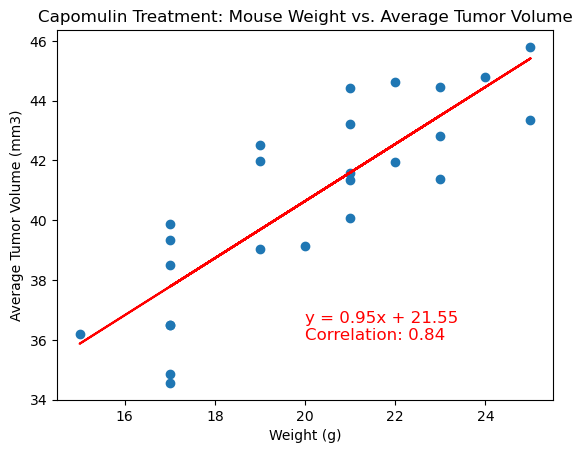

In [32]:
import matplotlib.pyplot as plt
import scipy.stats as st  # Importing for statistical calculations

# Step 1: Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]

# Step 2: Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Step 3: Create equation of the line for the linear regression model
regress_values = capomulin_avg['Weight (g)'] * slope + intercept

# Step 4: Create scatter plot
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')

# Step 5: Plot the linear regression model on top of the scatter plot
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")

# Step 6: Display correlation coefficient and linear regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nCorrelation: {correlation:.2f}', 
             (20, 36), fontsize=12, color='red')

# Display the combined scatter plot and linear regression model
plt.show()

